# Central Limit Theorem

In this notebook you will learn about the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). This theorem describes, in a very concise and quantitative manner, why the normal distribution is one of the key foundations of statistical modelling.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Statement of the CLT

We begin with a relatively precise statement of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) or CTL.

Let $X_i$ be a random variable with mean $\mu$ and variance $\sigma^2$:

* $ E[X_i] = \mu $
* $ var[X_i] = \sigma^2 $

A critical part of this theorem is that the $X_i$ can be drawn from *any* probability distribution, as long as it has a known $\mu$ and $\sigma^2$. The $X_i$ could be from the uniform distribution, the $\chi_k^2$ distribution or the [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution); any distribution will do!

Then we have the following:

$$ \sqrt{n} \left ( \left( \frac{1}{n} \sum_{i=1}^{n} X_i \right) - \mu \right) + \mu \rightarrow N(\mu,\sigma^2) $$

Here it is in words:

* Take $n$ random variates, $X_i$ from any distribution with $\mu$ and $\sigma^2$ and average them.
* Subtract $\mu$
* Multiply by $\sqrt{n}$
* Add $\mu$
* As $n$ becomes large, each time you do that process you will get a single random variate from $N(\mu, \sigma^2)$

Or at a slightly higher level:

> Taking lots of steps using random variates from *any* distribution will give you a normal distribution

## Alternate uniform distribution

To illustrate the Central Limit Theorem (CLT), we are going to use the uniform distribution. The usual parametrization of the uniform distribution is written in terms of the limits of the distribution $a$ and $b$ (this is what `numpy.random.uniform` uses):

$$ X \sim U(a,b) $$

To simulate the CLT, we need an alternate parametrization uses the mean and variance:

$$ X \sim U(\mu, \sigma^2) $$

The parameters are related through the transforms:

$$ d = \sqrt{3 \sigma^2} $$
$$ a = \mu -d $$
$$ b = \mu + d $$

Write a function, `uniform2`, that returns random variates from the uniform distribution parametrized by $\mu$ and $\sigma$:

In [16]:
def uniform2(mu, sigma, size=1):
    """Return uniform random variates with mean mu and standard dev sigma.
    """
    a = mu - np.sqrt(3*sigma**2)
    b = mu + np.sqrt(3*sigma**2)
    var = np.random.uniform(a,b,size)
    return var

In [17]:
np.random.seed(0)
mu = 10.0
sigma = 3.0
data = uniform2(mu, sigma, 300)
assert isinstance(data, np.ndarray)
assert abs(data.mean()-mu) < 0.2
assert abs(data.var()-sigma**2) < 0.2

## The CTL

Using the `uniform2` function above, write a function, `normal2(mu, sigma, size=1)` that simulates normal random variates using the CTL using the above equation:

* Use $n=200$ with the above equation
* Return your result as a NumPy array with `size` elements

In [44]:
def normal2(mu, sigma, size=1):
    """Return random variates from N(mu, sigma^2) using the CLT.
    
    Parameters
    ----------
    mu : float
        The mean of the normal distribution.
    sigma : float
        The standard deviation of the normal distribution.
    size : int
        The number of random variates to return as a NumPy array.
    Take n random variates, Xi from any distribution with μ and σ2 and average them.
    Subtract μ
    Multiply by n⎯⎯√
    Add μ
    As n becomes large, each time you do that process you will get a single random variate from N(μ,σ2)
    """
    
    r = uniform2(mu,sigma,size)
    return r

## Comparisons

Now you will compare the results of your `normal2` function with those of NumPy's own `numpy.random.normal` function.

* Draw `200` samples from using both `normal2` and `numpy.random.normal` for $\mu=5.0$ and $\sigma=0.5$.
* Make two distribution plots of this data using Seaborn's `distplot`.
* Each `distplot` should be in a separate Matplotlib `subplot` and the two subplots should be right above each other and have the same limits.
* Label your visualization appropriately.

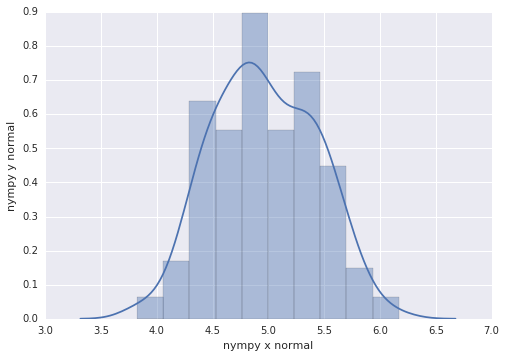

In [49]:
npy = np.random.normal(5.0,0.5, 200)

sns.distplot(npy)
plt.xlabel('nympy x normal')
plt.ylabel('nympy y normal')

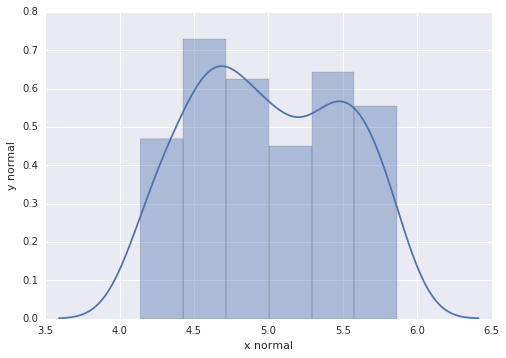

In [45]:
my_npy = normal2(5.0,0.5, 200)

sns.distplot(my_npy)
plt.xlabel('x normal')
plt.ylabel('y normal')

A better way of comparing two distributions is use make plots of the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). The CDF is just the integral of the probability density function (PDF). Here is a Python function that uses Matplotlib to make a CDF from a distribution of data.

In [46]:
def plot_cdf(data, **kwargs):
    """Plot the CDF of a 1d distribution of data.
    
    You can use kwargs to pass keyword arguments to the Matplotlib plotting function.
    """
    m = len(data)
    plt.step(sorted(data), np.arange(m), **kwargs)

Use this `plot_cdf` function to visualize the CDFs of the two data sets above. Include a legend and appropriate labels.

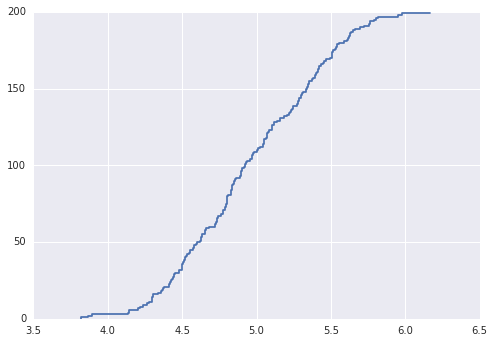

In [50]:
plot_cdf(npy)

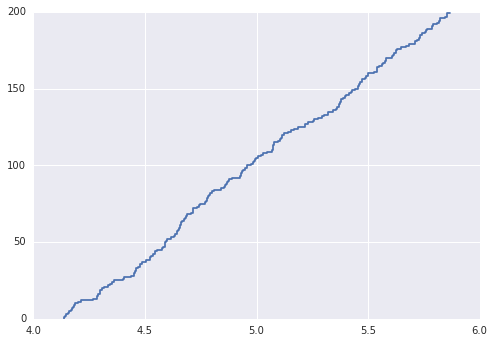

In [51]:
plot_cdf(my_npy)